In [86]:
#Python Notebook for Exploratory Analysis on NSDUH dataset
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [87]:
#1.Look at summary statistics for both types of diagnostic variables, and identify the response variables for seeking treatment. 
#Mental Health: Among those who are coded SPDYR = 1(subsample of 5696), 
#find predictors of AMHTXRC3 = 1(received any mental health trt past year)

#SPDYR is grouping var, AMHTXRC3 is response var, others are possible predictors
#AMHSVTYP(type of mental health treatment received in past year: coded 1-8) see pg 450(484)
#AMHTXND2(perceived need for mental health treatment in past year: . is unknown, 1 yes, 2 no)
mdiag_cols = ['CASEID','AMHTXRC3','AMHSVTYP','AMHTXND2','SPDYR','SPDMON','K6SCYR','K6SCMON','K6SCMAX','WHODASC2',
              'SMIPP_U','AMDELT','AMDEYR','ATXMDEYR','ARXMDEYR','IRINSUR4','GOVTPROG',
              'INCOME','POVERTY2','IRSEX','IRMARIT','HEALTH2','CATAG3','NEWRACE2','EDUCCAT2']
Mental_Diagnostics = pd.read_csv('C:/Users/Cody/Downloads/NSDUH/2014/NSDUH-2014-DS0001-data/NSDUH-2014-DS0001-data-excel.tsv',usecols=mdiag_cols, sep='\t', index_col=0)

In [88]:
Mental_Diagnostics.describe()

,AMHTXRC3,AMHSVTYP,AMHTXND2,K6SCMON,SPDMON,K6SCYR,K6SCMAX,SPDYR,WHODASC2,SMIPP_U,...,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,...,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000
mean,-0.860451,3.280075,-0.790270,1.017568,-2.167158,-4.242044,1.975123,-2.111487,0.792278,-2.181120,...,1.760164,2.585027,2.277343,1.121854,1.523765,14.387925,2.799533,2.551682,3.270504,2.182428
std,4.706729,7.232871,4.735816,6.948001,3.909216,8.867231,8.063145,3.946625,7.296613,3.897089,...,0.426987,1.138994,1.358044,0.327120,0.499439,31.407447,1.426004,2.366211,1.324381,0.952305
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,1.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000
25%,1.000000,-9.000000,1.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,0.002541,...,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,8.000000,2.000000,2.000000,0.000000,-9.000000,2.000000,0.000000,0.000000,0.008998,...,2.000000,2.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,2.000000,8.000000,2.000000,5.000000,0.000000,-9.000000,6.000000,0.000000,4.000000,0.008998,...,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,4.000000,5.000000,4.000000,3.000000
max,2.000000,8.000000,2.000000,24.000000,1.000000,24.000000,24.000000,1.000000,24.000000,0.929121,...,2.000000,4.000000,3.000000,2.000000,2.000000,99.000000,5.000000,7.000000,5.000000,4.000000


In [89]:
#change to N/A for missing data
Mental_Diagnostics.replace(-9, np.nan, inplace=True)
Mental_Diagnostics.IRMARIT.replace(99,np.nan,inplace=True)#1-married,2-widowed,3-seperated/div,4-never married
#change vars coded 1:yes, 2:no --> 1:yes, 0:no 
Mental_Diagnostics.AMHTXRC3.replace(2,0,inplace=True)#received any mental health trt past year
Mental_Diagnostics.AMHTXND2.replace(2,0,inplace=True)#perceived need for mental health treatment in past year
Mental_Diagnostics.AMDELT.replace(2,0,inplace=True)#lifetime major depressive episode
Mental_Diagnostics.AMDEYR.replace(2,0,inplace=True)#past year major depressive episode
Mental_Diagnostics.GOVTPROG.replace(2,0,inplace=True)#participate in government assistance programs
Mental_Diagnostics.IRINSUR4.replace(2,0,inplace=True)#1-has insurance, 0-no insurance
Mental_Diagnostics.IRSEX.replace(2,0,inplace=True)#1-male, 0-female
Mental_Diagnostics.describe()

,AMHTXRC3,AMHSVTYP,AMHTXND2,K6SCMON,SPDMON,K6SCYR,K6SCMAX,SPDYR,WHODASC2,SMIPP_U,...,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,41466.000000,41427.000000,41492.000000,41671.000000,41671.000000,13632.000000,41671.000000,41671.000000,41671.000000,41671.000000,...,55271.000000,55271.000000,54751.000000,55271.000000,55271.000000,48588.000000,55271.000000,55271.000000,55271.000000,55251.000000
mean,0.150605,7.383808,0.063916,4.286962,0.062849,10.291153,5.557030,0.136690,3.988145,0.044330,...,0.239836,2.585027,2.384450,0.878146,0.476235,2.750021,2.799533,2.551682,3.270504,2.186476
std,0.357668,1.600248,0.244606,4.537507,0.242695,6.199324,5.838672,0.343524,5.395138,0.125902,...,0.426987,1.138994,0.801514,0.327120,0.499439,1.391708,1.426004,2.366211,1.324381,0.928403
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002541,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,8.000000,0.000000,1.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.007445,...,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,0.000000,8.000000,0.000000,3.000000,0.000000,10.000000,4.000000,0.000000,1.000000,0.008998,...,0.000000,2.000000,3.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,0.000000,8.000000,0.000000,6.000000,0.000000,15.000000,8.000000,0.000000,6.000000,0.012713,...,0.000000,4.000000,3.000000,1.000000,1.000000,4.000000,4.000000,5.000000,4.000000,3.000000
max,1.000000,8.000000,1.000000,24.000000,1.000000,24.000000,24.000000,1.000000,24.000000,0.929121,...,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,5.000000,4.000000


In [90]:
mh_sample = Mental_Diagnostics[Mental_Diagnostics.SPDYR==1]
mh_sample.describe()
#SPDYR = 1(subsample of 5696 adults) experienced psychological distress this past year

,AMHTXRC3,AMHSVTYP,AMHTXND2,K6SCMON,SPDMON,K6SCYR,K6SCMAX,SPDYR,WHODASC2,SMIPP_U,...,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,5679.000000,5664.000000,5678.000000,5696.000000,5696.000000,4829.000000,5696.000000,5696.0,5696.000000,5696.000000,...,5696.000000,5696.000000,5588.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5696.000000,5695.000000
mean,0.445325,6.372881,0.294470,11.734551,0.459796,17.196935,17.309340,1.0,11.943294,0.226220,...,0.343574,2.193820,2.170186,0.826369,0.350948,3.044593,2.980513,2.413799,2.576194,2.615101
std,0.497045,2.165682,0.455844,5.319216,0.498425,3.747292,3.516746,0.0,6.258279,0.259794,...,0.474943,1.098009,0.850057,0.378825,0.477309,1.272846,1.064458,2.294922,0.982635,0.973147
min,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,13.000000,1.0,0.000000,0.004284,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,0.000000,6.000000,0.000000,8.000000,0.000000,14.000000,14.000000,1.0,8.000000,0.029295,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,0.000000,8.000000,0.000000,12.000000,0.000000,17.000000,17.000000,1.0,12.000000,0.105737,...,0.000000,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,3.000000
75%,1.000000,8.000000,1.000000,15.000000,1.000000,19.000000,19.000000,1.0,16.000000,0.352628,...,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,1.000000,8.000000,1.000000,24.000000,1.000000,24.000000,24.000000,1.0,24.000000,0.929121,...,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,4.000000,4.000000


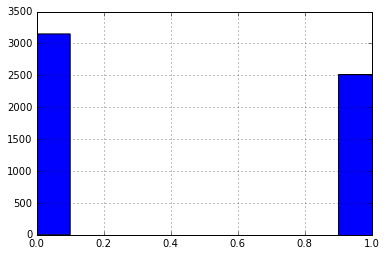

In [91]:
mh_sample.AMHTXRC3.hist()
#It looks to be about a half and half split 
#Slightly less than half of adults experiencing serious psychological distress in the 
#past year did not receive any form of mental health treatment in the past year.


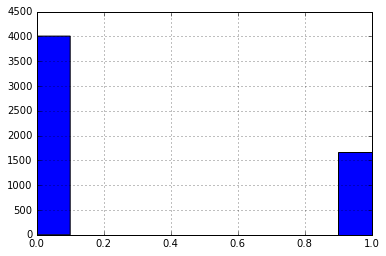

In [92]:
mh_sample.AMHTXND2.hist()
#However, an even lower proportion of those adults have had a self-perceived need 
#for mental health treatment in the past year.

In [93]:
#this is the subset which was predicted to have a serious mental illness
#could provide some useful insights
mh_sample[mh_sample.SMIPP_U>.5].describe()

,AMHTXRC3,AMHSVTYP,AMHTXND2,K6SCMON,SPDMON,K6SCYR,K6SCMAX,SPDYR,WHODASC2,SMIPP_U,...,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,979.000000,975.000000,978.000000,979.000000,979.000000,861.000000,979.000000,979.0,979.000000,979.000000,...,979.000000,979.000000,967.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000,979.000000
mean,0.703779,5.851282,0.555215,14.490296,0.648621,20.277584,20.182840,1.0,18.607763,0.719821,...,0.401430,2.102145,2.111686,0.821246,0.331971,2.971399,3.254341,2.262513,2.539326,2.938713
std,0.456823,2.006006,0.497196,5.374964,0.477645,3.305151,3.258507,0.0,4.095159,0.134518,...,0.490438,1.086158,0.842663,0.383342,0.471161,1.244702,1.069979,2.236419,0.968436,0.959466
min,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,13.000000,1.0,2.000000,0.500220,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,0.000000,11.000000,0.000000,18.000000,18.000000,1.0,16.000000,0.596952,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,2.000000
50%,1.000000,6.000000,1.000000,15.000000,1.000000,20.000000,20.000000,1.0,19.000000,0.730806,...,0.000000,2.000000,2.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,3.000000
75%,1.000000,8.000000,1.000000,18.000000,1.000000,24.000000,24.000000,1.0,22.000000,0.837346,...,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,4.000000
max,1.000000,8.000000,1.000000,24.000000,1.000000,24.000000,24.000000,1.0,24.000000,0.929121,...,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,4.000000,4.000000


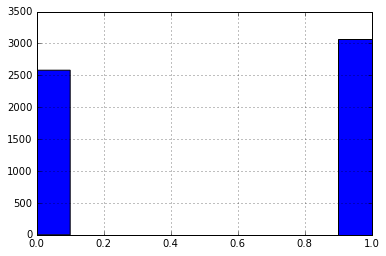

In [104]:
#make histograms for categorical vars
mh_sample.AMDELT.hist()

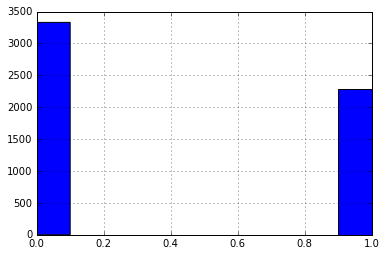

In [105]:
mh_sample.AMDEYR.hist()

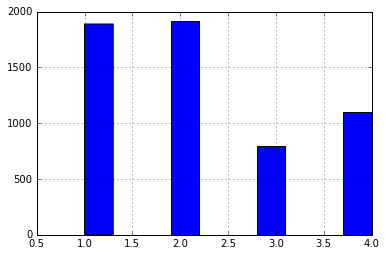

In [102]:
mh_sample.INCOME.hist()

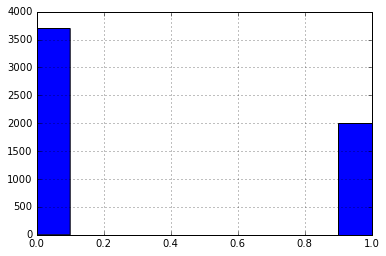

In [106]:
mh_sample.IRSEX.hist()
#now this is interesting, almost two thirds of the sample experiencing serious psychological distress is female

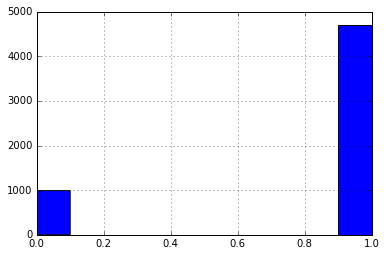

In [107]:
mh_sample.IRINSUR4.hist()
#most of the sample has some form of insurance

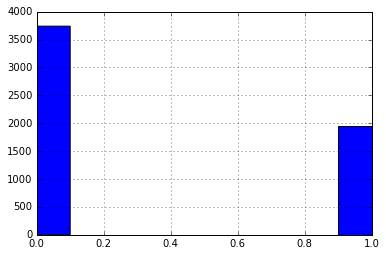

In [113]:
mh_sample.GOVTPROG.hist()
#2/3 not in govtprogam

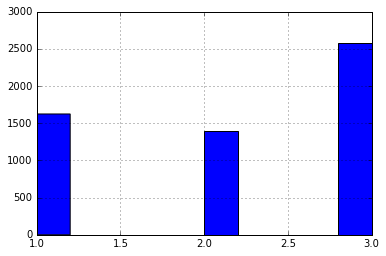

In [115]:
mh_sample.POVERTY2.hist()
#a little more than half are living within 2x the poverty level

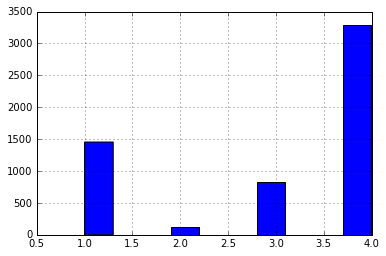

In [116]:
mh_sample.IRMARIT.hist()
#half have never married

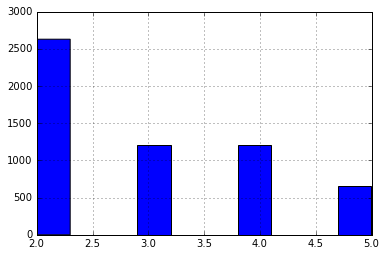

In [117]:
mh_sample.CATAG3.hist()
#compared to distribution of whole survey, age group 18-25 is over-represented

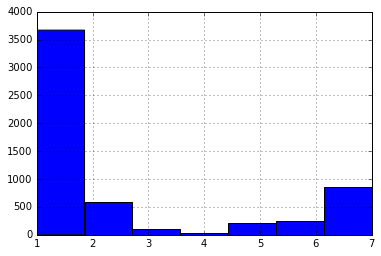

In [120]:
mh_sample.NEWRACE2.hist(bins=7)
#whole survey race distribution
#could be worth performing anova, but distribution looks similar enough
#1 = NonHisp White..................................60.67 pct
#2 = NonHisp Black/Afr Am ..........................12.11 pct
#3 = NonHisp Native Am/AK Native....................1.64 pct
#4 = NonHisp Native HI/Other Pac Isl ...............0.54 pct
#5 = NonHisp Asian..................................4.26 pct
#6 = NonHisp more than one race ....................3.54 pct
#7 = Hispanic.......................................17.23 pct

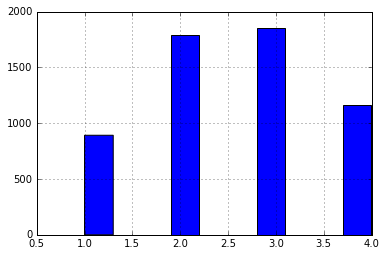

In [121]:
mh_sample.EDUCCAT2.hist()

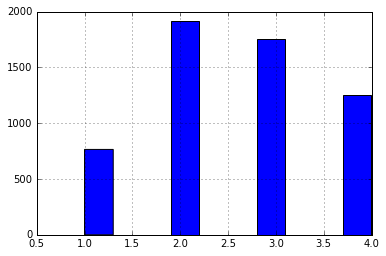

In [122]:
mh_sample.HEALTH2.hist()

In [94]:
#Substance: Among those who are coded TXNDILAL = 1(subsample of 5458 who need sub trtmnt),
#find predictors of TXILLALC =1(received sub trtmnt past year)

#TXNDILAL is grouping var, TXILLALC is response var, others are possible predictors
subdiag_cols = ['CASEID','TXNDILAL','TXGPILAL','TXILALEV','TXILLALC','ALCTRMT','ILLTRMT',
                'IRINSUR4','GOVTPROG','INCOME','POVERTY2','IRSEX','IRMARIT','HEALTH2',
                'CATAG3','NEWRACE2','EDUCCAT2']
Substance_Diagnostics = pd.read_csv('C:/Users/Cody/Downloads/NSDUH/2014/NSDUH-2014-DS0001-data/NSDUH-2014-DS0001-data-excel.tsv',usecols=subdiag_cols, sep='\t', index_col=0)
Substance_Diagnostics.describe()

,TXILALEV,ALCTRMT,ILLTRMT,TXILLALC,TXNDILAL,TXGPILAL,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000
mean,0.056485,0.010946,0.011217,0.018093,0.098750,0.087496,1.760164,2.585027,2.277343,1.121854,1.523765,14.387925,2.799533,2.551682,3.270504,2.182428
std,0.230859,0.104050,0.105318,0.133288,0.298328,0.282563,0.426987,1.138994,1.358044,0.327120,0.499439,31.407447,1.426004,2.366211,1.324381,0.952305
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-9.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,3.000000,1.000000,2.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,3.000000,1.000000,2.000000,4.000000,4.000000,5.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,2.000000,2.000000,99.000000,5.000000,7.000000,5.000000,4.000000


In [95]:
#change to N/A for missing data
Substance_Diagnostics.replace(-9, np.nan, inplace=True)
Substance_Diagnostics.IRMARIT.replace(99,np.nan,inplace=True)#1-married,2-widowed,3-seperated/div,4-never married
#change vars coded 1:yes, 2:no --> 1:yes, 0:no 
Substance_Diagnostics.GOVTPROG.replace(2,0,inplace=True)#participated in govt assistance program
Substance_Diagnostics.IRINSUR4.replace(2,0,inplace=True)#1-has insurance, 0-no insurance
Substance_Diagnostics.IRSEX.replace(2,0,inplace=True)#1-male, 0-female
Substance_Diagnostics.describe()

,TXILALEV,ALCTRMT,ILLTRMT,TXILLALC,TXNDILAL,TXGPILAL,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,55271.000000,54751.000000,55271.000000,55271.000000,48588.000000,55271.000000,55271.000000,55271.000000,55251.000000
mean,0.056485,0.010946,0.011217,0.018093,0.098750,0.087496,0.239836,2.585027,2.384450,0.878146,0.476235,2.750021,2.799533,2.551682,3.270504,2.186476
std,0.230859,0.104050,0.105318,0.133288,0.298328,0.282563,0.426987,1.138994,0.801514,0.327120,0.499439,1.391708,1.426004,2.366211,1.324381,0.928403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,1.000000,0.000000,4.000000,3.000000,1.000000,3.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,1.000000,1.000000,4.000000,4.000000,5.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,5.000000,4.000000


In [96]:
#TXNDILAL is coded 1 if an individual meets any of the following three criteria
#1. Dependent on any illicit drug or alcohol in the past year (DPILLALC=1).
#2. Illicit drug or alcohol abuse in the past year (ABILLALC=1).
#3. Received treatment for illicit drug or alcohol use at a specialty facility in the past year including a hospital (inpatient),
#rehabilitation facility (in or outpatient), or mental health center (SPILLALC=1).
sub_sample = Substance_Diagnostics[Substance_Diagnostics.TXNDILAL == 1]
sub_sample.describe()

,TXILALEV,ALCTRMT,ILLTRMT,TXILLALC,TXNDILAL,TXGPILAL,GOVTPROG,INCOME,POVERTY2,IRINSUR4,IRSEX,IRMARIT,CATAG3,NEWRACE2,EDUCCAT2,HEALTH2
count,5458.000000,5458.000000,5458.000000,5458.000000,5458.0,5458.000000,5458.000000,5458.000000,5360.000000,5458.000000,5458.000000,5331.000000,5458.000000,5458.000000,5458.000000,5458.000000
mean,0.256871,0.091425,0.098021,0.146757,1.0,0.886039,0.288750,2.359106,2.272761,0.818615,0.594357,3.294504,2.649872,2.507145,2.942287,2.370099
std,0.436947,0.288240,0.297371,0.353896,0.0,0.317793,0.453223,1.137122,0.835982,0.385372,0.491061,1.179693,1.152469,2.337174,1.245319,0.921154
min,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,2.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,3.000000,2.000000
75%,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,4.000000,4.000000,3.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,4.000000,3.000000,1.000000,1.000000,4.000000,5.000000,7.000000,5.000000,4.000000
